<a href="https://colab.research.google.com/github/harshu722/ML-AI-personal-1/blob/main/NLP_and_AI_Using_GPU_By_Saharsh_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

#from wordcloud import WordCloud
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

# Reset individual options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

# Set desired options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_colwidth', 200)

import warnings
warnings.filterwarnings("ignore")


In [5]:
train = pd.read_csv('training.csv',header=None)
validation = pd.read_csv('validation.csv',header=None)

train.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
validation.columns=['Tweet ID','Entity','Sentiment','Tweet Content']

print("Training DataSet: \n")
train = train.sample(5000)
display(train.head())


Training DataSet: 



,Tweet ID,Entity,Sentiment,Tweet Content
47998,5839,HomeDepot,Negative,"Asurion rejected the claim. Normal good maint. Everything they said. Now I can perhaps either pay another weingartz $ 260 to fix it, or $ 90 for a diag fee to get it back. Then I wouldn't have sen..."
44452,11635,Verizon,Negative,Don't just use
67735,3601,Cyberpunk2077,Neutral,Oh my Lanta.
64456,7842,MaddenNFL,Positive,THE MY BOY KUPP TO FINALLY GOT AT HIS AN RESPECT
41113,1456,Battlefield,Irrelevant,Had a nice warm up round at Ole Ballroom Lightning...


In [6]:
print("Validation DataSet: \n")
display(validation.head())


Validation DataSet: 



,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma..."
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking, it's a truly awful game."
4,4433,Google,Neutral,Now the President is slapping Americans in the face that he really did commit an unlawful act after his acquittal! From Discover on Google vanityfair.com/news/2020/02/t…


In [7]:
train = train.dropna(subset=['Tweet Content'])

display(train.isnull().sum())
print("*****"* 5)
display(validation.isnull().sum())


,0
Tweet ID,0
Entity,0
Sentiment,0
Tweet Content,0


*************************


,0
Tweet ID,0
Entity,0
Sentiment,0
Tweet Content,0


In [8]:
duplicates = train[train.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
train = train.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')

duplicates = validation[validation.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
validation = validation.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')


In [9]:
import pandas as pd

# Assuming 'train' and 'validation' are your DataFrames

# Calculate sentiment counts for train and validation data
sentiment_counts_train = train['Sentiment'].value_counts()
sentiment_counts_validation = validation['Sentiment'].value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.concat([sentiment_counts_train, sentiment_counts_validation], axis=1)

# Fill missing values (if any) with 0
combined_counts.fillna(0, inplace=True)

# Rename columns
combined_counts.columns = ['Test Data', 'Validation Data']  # Set desired column names

combined_counts


,Test Data,Validation Data
Sentiment,,
Negative,1501,266
Positive,1342,277
Neutral,1196,285
Irrelevant,896,172


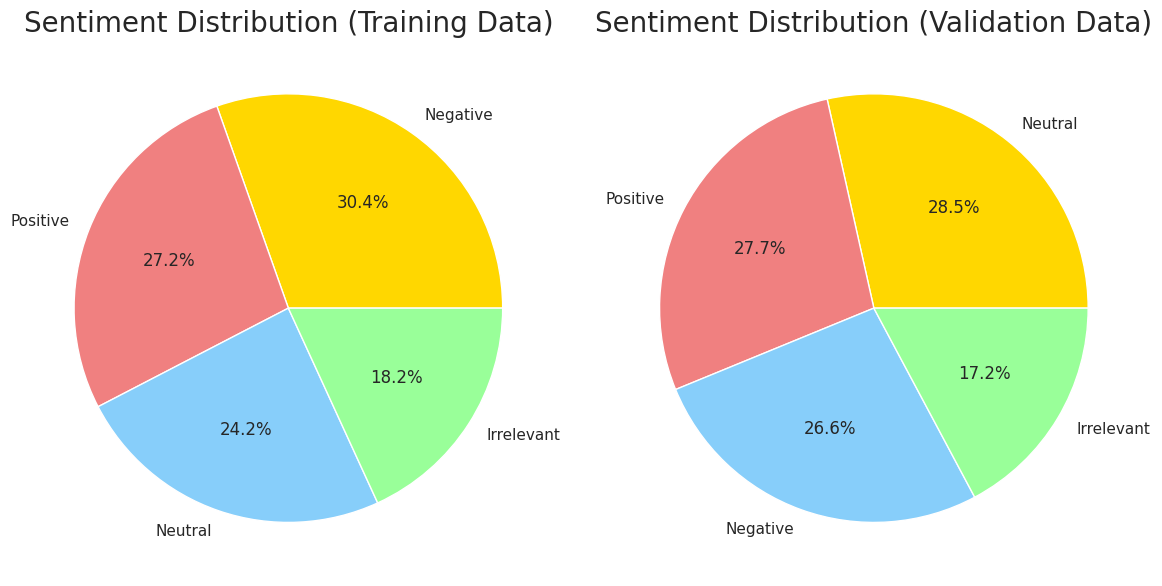

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' and 'validation' are your DataFrames

# Calculate sentiment counts
sentiment_counts_train = train['Sentiment'].value_counts()
sentiment_counts_validation = validation['Sentiment'].value_counts()

# Create subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize for better view

# Create pie chart for training data
ax1.pie(sentiment_counts_train, labels=sentiment_counts_train.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue','#99FF99'])
ax1.set_title('Sentiment Distribution (Training Data)', fontsize=20)

# Create pie chart for validation data
ax2.pie(sentiment_counts_validation, labels=sentiment_counts_validation.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue','#99FF99'])
ax2.set_title('Sentiment Distribution (Validation Data)', fontsize=20)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [11]:
# Calculate the value counts of 'Entity'
entity_counts = train['Entity'].value_counts()

# Get the top 9 names
top_names = entity_counts.head(19)

# Aggregate the tenth name as 'Other'
other_count = entity_counts[19:].sum()
top_names['Other'] = other_count

# Display the top 19 names and 'Other'
top_names.to_frame()

,count
Entity,
TomClancysRainbowSix,186
CallOfDutyBlackopsColdWar,169
Facebook,166
Cyberpunk2077,166
Google,166
AssassinsCreed,165
FIFA,165
Verizon,162
Microsoft,160


In [12]:
# Calculate the value counts of 'Entity'
entity_counts = train['Entity'].value_counts()

# Get the top 9 names
top_names = entity_counts.head(19)

# Aggregate the tenth name as 'Other'
other_count = entity_counts[19:].sum()
top_names['Other'] = other_count

# Display the top 19 names and 'Other'
top_names.to_frame()

,count
Entity,
TomClancysRainbowSix,186
CallOfDutyBlackopsColdWar,169
Facebook,166
Cyberpunk2077,166
Google,166
AssassinsCreed,165
FIFA,165
Verizon,162
Microsoft,160


In [13]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split


In [14]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you've already run the data preprocessing steps
data = train[['Tweet Content', 'Sentiment']]

# Set your model output as categorical and save in new label col
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])

# Transform your output to numeric
data['Sentiment'] = data['Sentiment_label'].cat.codes

# Use the entire training data as data_train
data_train = data

# Use validation data as data_test
data_test = validation[['Tweet Content', 'Sentiment']]
data_test['Sentiment_label'] = pd.Categorical(data_test['Sentiment'])
data_test['Sentiment'] = data_test['Sentiment_label'].cat.codes

# Create a colorful table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data_train.columns),
        fill_color='paleturquoise',
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[data_train[k].tolist()[:10] for k in data_train.columns],
        fill_color=[
            'lightcyan',  # Tweet Content
            ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
              else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_train['Sentiment_label'][:10]],  # Sentiment
            ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
              else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_train['Sentiment_label'][:10]],  # Sentiment_label
            'lavender'  # Sentiment (numeric)
        ],
        align='left',
        font=dict(color='black', size=11)
    ))
])

# Update the layout
fig.update_layout(
    title='First 10 Rows of Training Data',
    width=1000,
    height=500,
)

fig.show()

In [15]:
import plotly.graph_objects as go

# Create a colorful table using Plotly for the test data
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data_test.columns),
        fill_color='paleturquoise',
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[data_test[k].tolist()[:5] for k in data_test.columns],  # Show first 5 rows
        fill_color=[
            'lightcyan',  # Tweet Content
            ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
             else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_test['Sentiment_label'][:5]],  # Sentiment
            ['lightgreen' if s == 'Positive' else 'lightpink' if s == 'Negative'
             else 'lightyellow' if s == 'Neutral' else 'lightgray' for s in data_test['Sentiment_label'][:5]],  # Sentiment_label
            'lavender'  # Sentiment (numeric)
        ],
        align='left',
        font=dict(color='black', size=11)
    ))
])

# Update the layout
fig.update_layout(
    title='First 5 Rows of Test Data',
    width=1000,
    height=500,
)

# Show the figure
fig.show()


In [16]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report
from torch.cuda.amp import autocast, GradScaler

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
    return df['Tweet Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Custom Dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and datasets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len=64)  # Reduced max_len to 64
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer, max_len=64)

# DataLoader optimizations
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Model and device setup
model_BERT = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_BERT.to(device)

# Optimizer and mixed-precision scaler
optimizer = AdamW(model_BERT.parameters(), lr=2e-5)
scaler = GradScaler()  # Used for mixed-precision training

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_BERT.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with autocast():  # Mixed-precision context
            outputs = model_BERT(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        scaler.scale(loss).backward()  # Scale the loss to prevent underflows
        scaler.step(optimizer)
        scaler.update()  # Update the scaler for the next iteration

    # Evaluation on test set
    model_BERT.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            with autocast():  # Mixed-precision context
                outputs = model_BERT(input_ids, attention_mask=attention_mask)
                preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()

            test_preds.extend(preds)
            test_true.extend(labels.cpu().numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')

# Save the model
model_BERT.save_pretrained('./sentiment_model_BERT')
tokenizer.save_pretrained('./sentiment_model_BERT')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.5930
Epoch 2/3, Test Accuracy: 0.6200
Epoch 3/3, Test Accuracy: 0.6360


('./sentiment_model_BERT/tokenizer_config.json',
 './sentiment_model_BERT/special_tokens_map.json',
 './sentiment_model_BERT/vocab.txt',
 './sentiment_model_BERT/added_tokens.json')

In [20]:
%%time

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the dataF
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
    return df['Tweet Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Create a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and create datasets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model_BERT
model_BERT = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_BERT.to(device)

# Set up optimizer
optimizer = AdamW(model_BERT.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_BERT.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_BERT(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model_BERT.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            outputs = model_BERT(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')


# Save the model_BERT
torch.save(model_BERT.state_dict(), 'sentiment_model_BERT.pth')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.5930
Epoch 2/3, Test Accuracy: 0.6310
Epoch 3/3, Test Accuracy: 0.6650
CPU times: user 2min 52s, sys: 2min 12s, total: 5min 4s
Wall time: 5min 26s


In [18]:
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))


              precision    recall  f1-score   support

    Negative       0.70      0.86      0.77       266
     Neutral       0.73      0.55      0.63       285
    Positive       0.66      0.78      0.72       277
  Irrelevant       0.56      0.44      0.49       172

    accuracy                           0.68      1000
   macro avg       0.66      0.66      0.65      1000
weighted avg       0.67      0.68      0.67      1000



In [21]:
from sklearn.metrics import confusion_matrix

# Check if test_true labels need conversion (optional)
if not isinstance(test_true[0], str):  # If labels are not strings
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    test_true_encoded = encoder.fit_transform(test_true)  # Encode labels
    labels = [0, 1, 2, 3]  # Numerical labels
else:
    test_true_encoded = test_true
    labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels

# Calculate confusion matrix with consistent labels
confusion_matrix_BERT = confusion_matrix(test_true_encoded, test_preds, labels=labels)

print("Confusion matrix BERT \n")
confusion_matrix_BERT


Confusion matrix BERT 



array([[222,  18,  11,  15],
       [ 49, 160,  31,  45],
       [ 28,  30, 195,  24],
       [ 26,  26,  32,  88]])

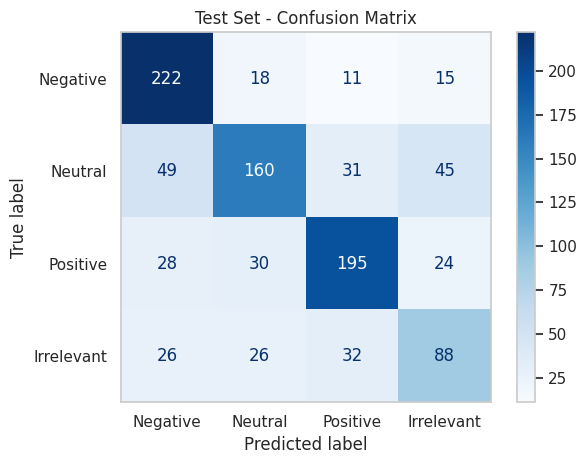

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels
test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_BERT, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


In [23]:
%%time

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
    return df['Tweet Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Create a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and create datasets
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)
model_RoBERTa = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_RoBERTa.to(device)

# Set up optimizer
optimizer = AdamW(model_RoBERTa.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_RoBERTa.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_RoBERTa(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model_RoBERTa.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            outputs = model_RoBERTa(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')


# Save the model
torch.save(model_RoBERTa.state_dict(), 'sentiment_RoBERTa_model.pth')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.6040
Epoch 2/3, Test Accuracy: 0.6700
Epoch 3/3, Test Accuracy: 0.6880
CPU times: user 3min 2s, sys: 2min 23s, total: 5min 26s
Wall time: 5min 37s


In [24]:
# Final evaluation
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))


              precision    recall  f1-score   support

    Negative       0.64      0.89      0.75       266
     Neutral       0.71      0.61      0.66       285
    Positive       0.75      0.72      0.73       277
  Irrelevant       0.64      0.45      0.53       172

    accuracy                           0.69      1000
   macro avg       0.69      0.67      0.67      1000
weighted avg       0.69      0.69      0.68      1000



In [25]:
from sklearn.metrics import confusion_matrix

# Check if test_true labels need conversion (optional)
if not isinstance(test_true[0], str):  # If labels are not strings
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    test_true_encoded = encoder.fit_transform(test_true)  # Encode labels
    labels = [0, 1, 2, 3]  # Numerical labels
else:
    test_true_encoded = test_true
    labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels

# Calculate confusion matrix with consistent labels
confusion_matrix_RoBERTa = confusion_matrix(test_true_encoded, test_preds, labels=labels)

print("Confusion matrix RoBERTa \n")
confusion_matrix_RoBERTa



Confusion matrix RoBERTa 



array([[238,  16,   8,   4],
       [ 58, 173,  31,  23],
       [ 33,  28, 199,  17],
       [ 40,  25,  29,  78]])

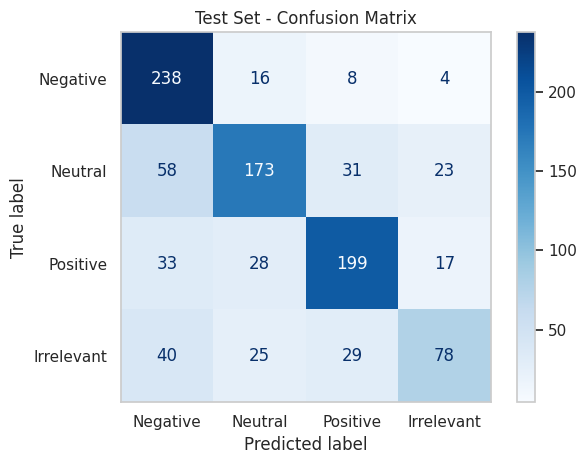

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels
test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_RoBERTa, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


In [28]:
%%time

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
    return df['Tweet Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Create a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and create datasets
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model DistilBERT
model_DistilBERT = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_DistilBERT.to(device)

# Set up optimizer
optimizer = AdamW(model_DistilBERT.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_DistilBERT.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_DistilBERT(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model_DistilBERT.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            outputs = model_DistilBERT(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')


# Save the model_DistilBERT
torch.save(model_DistilBERT.state_dict(), 'sentiment_model_distilbert.pth')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.6060
Epoch 2/3, Test Accuracy: 0.6580
Epoch 3/3, Test Accuracy: 0.6920
CPU times: user 2min 15s, sys: 20.3 s, total: 2min 36s
Wall time: 2min 50s


In [29]:
# Final evaluation
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))


              precision    recall  f1-score   support

    Negative       0.75      0.77      0.76       266
     Neutral       0.63      0.70      0.66       285
    Positive       0.79      0.69      0.74       277
  Irrelevant       0.56      0.56      0.56       172

    accuracy                           0.69      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.70      0.69      0.69      1000



In [30]:
from sklearn.metrics import confusion_matrix

# Check if test_true labels need conversion (optional)
if not isinstance(test_true[0], str):  # If labels are not strings
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    test_true_encoded = encoder.fit_transform(test_true)  # Encode labels
    labels = [0, 1, 2, 3]  # Numerical labels
else:
    test_true_encoded = test_true
    labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels

# Calculate confusion matrix with consistent labels
confusion_matrix_DistilBERT = confusion_matrix(test_true_encoded, test_preds, labels=labels)

print("Confusion matrix DistilBERT \n")
confusion_matrix_DistilBERT


Confusion matrix DistilBERT 



array([[206,  33,   8,  19],
       [ 29, 199,  21,  36],
       [ 20,  46, 190,  21],
       [ 18,  36,  21,  97]])

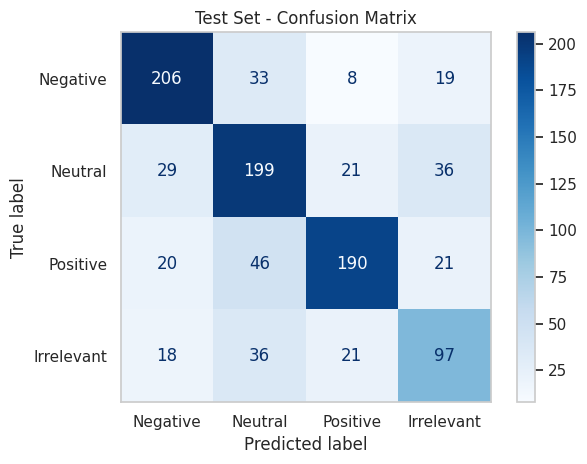

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels
test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_DistilBERT, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


In [32]:
%%time

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AlbertTokenizer, AlbertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
    return df['Tweet Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Create a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and create datasets
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
model_ALBERT = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_ALBERT.to(device)

# Set up optimizer
optimizer = AdamW(model_ALBERT.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_ALBERT.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_ALBERT(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model_ALBERT.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            outputs = model_ALBERT(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')

# Final evaluation
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))

# Save the model
torch.save(model_ALBERT.state_dict(), 'sentiment_model_albert.pth')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.5510
Epoch 2/3, Test Accuracy: 0.5940
Epoch 3/3, Test Accuracy: 0.6290
              precision    recall  f1-score   support

    Negative       0.61      0.86      0.72       266
     Neutral       0.63      0.54      0.58       285
    Positive       0.71      0.68      0.70       277
  Irrelevant       0.48      0.34      0.40       172

    accuracy                           0.63      1000
   macro avg       0.61      0.60      0.60      1000
weighted avg       0.62      0.63      0.62      1000

CPU times: user 4min 28s, sys: 1min 5s, total: 5min 33s
Wall time: 5min 40s


In [33]:
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))


              precision    recall  f1-score   support

    Negative       0.61      0.86      0.72       266
     Neutral       0.63      0.54      0.58       285
    Positive       0.71      0.68      0.70       277
  Irrelevant       0.48      0.34      0.40       172

    accuracy                           0.63      1000
   macro avg       0.61      0.60      0.60      1000
weighted avg       0.62      0.63      0.62      1000



In [34]:
from sklearn.metrics import confusion_matrix

# Check if test_true labels need conversion (optional)
if not isinstance(test_true[0], str):  # If labels are not strings
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    test_true_encoded = encoder.fit_transform(test_true)  # Encode labels
    labels = [0, 1, 2, 3]  # Numerical labels
else:
    test_true_encoded = test_true
    labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels

# Calculate confusion matrix with consistent labels
confusion_matrix_ALBERT = confusion_matrix(test_true_encoded, test_preds, labels=labels)

print("Confusion matrix ALBERT \n")
confusion_matrix_ALBERT


Confusion matrix ALBERT 



array([[230,  15,  14,   7],
       [ 68, 153,  26,  38],
       [ 37,  34, 188,  18],
       [ 39,  39,  36,  58]])

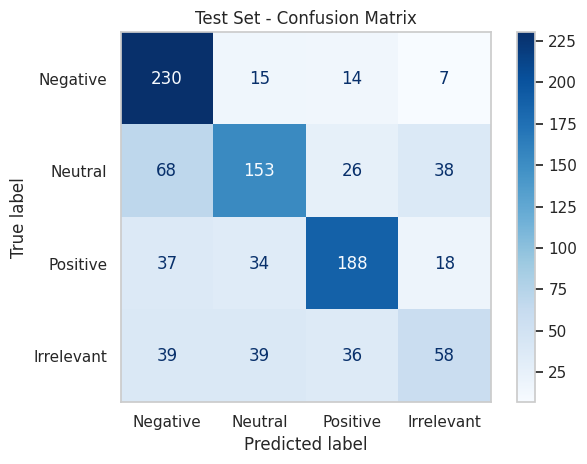

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels
test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ALBERT, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [36]:
%%time
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import XLNetTokenizer, XLNetForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
    return df['Tweet Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Create a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and create datasets
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model XLNet
model_XLNet = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_XLNet.to(device)

# Set up optimizer
optimizer = AdamW(model_XLNet.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_XLNet.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_XLNet(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model_XLNet.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            labels = batch['labels']
            outputs = model_XLNet(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')

# Save the model_XLNet
torch.save(model_XLNet.state_dict(), 'sentiment_model_xlnet.pth')

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.5570
Epoch 2/3, Test Accuracy: 0.6060
Epoch 3/3, Test Accuracy: 0.6520
CPU times: user 4min 9s, sys: 3min 2s, total: 7min 12s
Wall time: 7min 28s


In [45]:
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       172
     Neutral       0.36      0.92      0.52       266
    Positive       0.41      0.09      0.15       285
  Irrelevant       0.54      0.49      0.52       277

    accuracy                           0.41      1000
   macro avg       0.33      0.38      0.30      1000
weighted avg       0.36      0.41      0.32      1000



In [38]:
from sklearn.metrics import confusion_matrix

# Check if test_true labels need conversion (optional)
if not isinstance(test_true[0], str):  # If labels are not strings
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    test_true_encoded = encoder.fit_transform(test_true)  # Encode labels
    labels = [0, 1, 2, 3]  # Numerical labels
else:
    test_true_encoded = test_true
    labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels

# Calculate confusion matrix with consistent labels
confusion_matrix_XLNet = confusion_matrix(test_true_encoded, test_preds, labels=labels)

print("Confusion matrix XLNet \n")
confusion_matrix_XLNet


Confusion matrix XLNet 



array([[175,  40,  25,  26],
       [ 20, 194,  39,  32],
       [ 12,  42, 188,  35],
       [ 12,  48,  17,  95]])

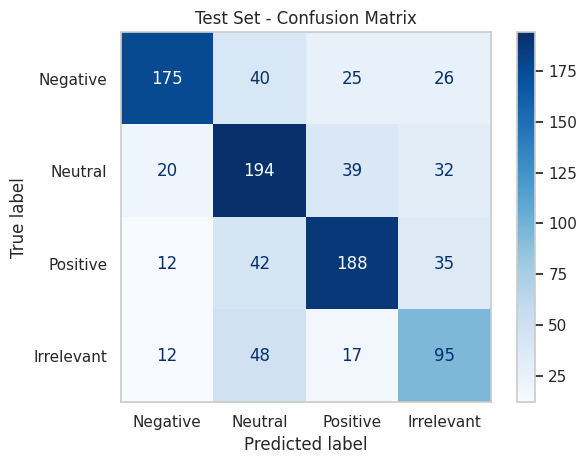

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']  # String labels
test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_XLNet, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


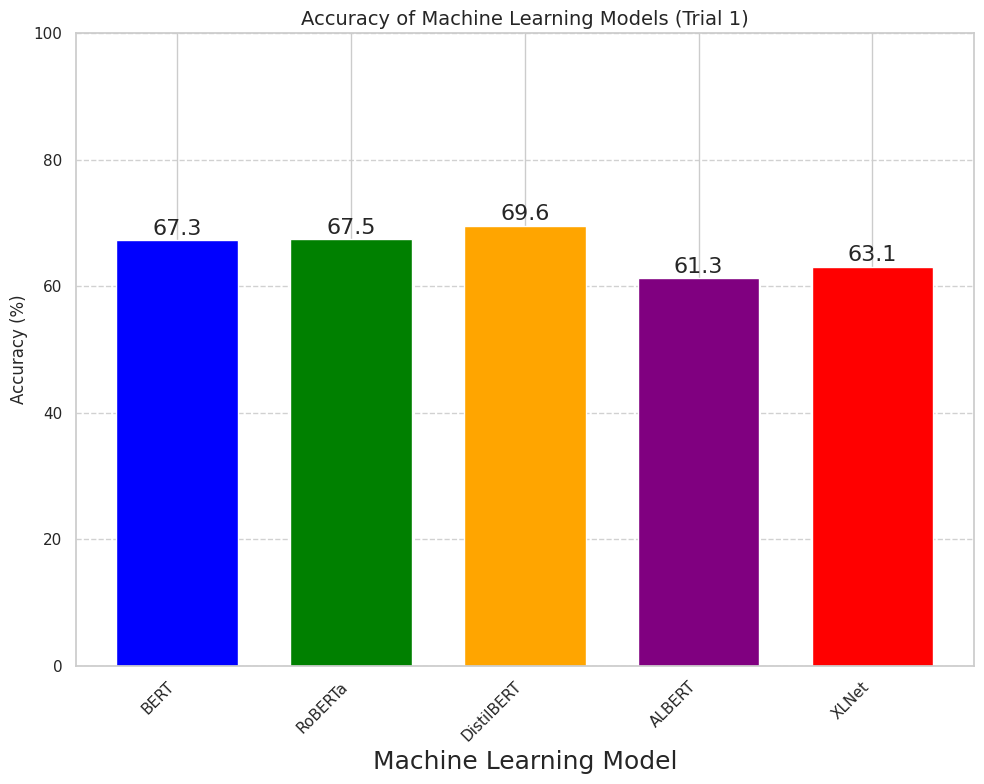

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar graph (only Trial 1)
models = ["BERT", "RoBERTa", "DistilBERT", "ALBERT", "XLNet"]

accuracy_trial_1 = [67.3, 67.50, 69.60, 61.3, 63.1]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Set the width of each bar and the positions of the bars
width = 0.7

# Create bars with different colors
colors = ['blue', 'green', 'orange', 'purple', 'red', 'magenta']
ax.bar(models, accuracy_trial_1, width, color=colors)

# Customize the plot
ax.set_ylabel('Accuracy (%)', fontsize=12)  # Increase font size for y-axis label
ax.set_xlabel('Machine Learning Model', fontsize=18)  # Increase font size for x-axis label
ax.set_title('Accuracy of Machine Learning Models (Trial 1)', fontsize=14)  # Increase font size for title

# Setxticks and rotate x-axis labels for better readability
ax.set_xticks(models)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=11)  # Increase font size for x-axis tick labels

# Add value labels on top of each bar with increased font size
for i, v in enumerate(accuracy_trial_1):
    ax.text(i, v + 0.2, f'{v:.1f}', ha='center', va='bottom', fontsize=16)  # Adjust vertical offset and format to one decimal place

# Set y-axis to start at 0
ax.set_ylim(0, 100)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()

In [44]:
%%time
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment_label'].map({'Positive': 'positive', 'Negative': 'negative', 'Neutral': 'neutral', 'Irrelevant': 'irrelevant'})
    return df['Tweet Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(data_train)
test_texts, test_labels = preprocess_data(data_test)

# Create a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Prepare input
        input_text = f"sentiment classification: {text}"
        input_encoding = self.tokenizer.encode_plus(
            input_text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        # Prepare target
        target_encoding = self.tokenizer.encode_plus(
            label,
            add_special_tokens=True,
            max_length=10,  # Assuming labels are short
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )

        return {
            'input_ids': input_encoding['input_ids'].flatten(),
            'attention_mask': input_encoding['attention_mask'].flatten(),
            'labels': target_encoding['input_ids'].flatten()
        }

# Initialize tokenizer and create datasets
tokenizer = T5Tokenizer.from_pretrained('t5-small')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model T5
model_T5 = T5ForConditionalGeneration.from_pretrained('t5-small')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_T5.to(device)

# Set up optimizer
optimizer = AdamW(model_T5.parameters(), lr=2e-5)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model_T5.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_T5(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model_T5.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            outputs = model_T5.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=10)
            preds = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
            test_preds.extend(preds)
            test_true.extend([tokenizer.decode(label, skip_special_tokens=True) for label in labels])

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')


# Save the model_T5
torch.save(model_T5.state_dict(), 'sentiment_model_t5.pth')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1/3, Test Accuracy: 0.2810
Epoch 2/3, Test Accuracy: 0.3500
Epoch 3/3, Test Accuracy: 0.4090
CPU times: user 1min 50s, sys: 16.3 s, total: 2min 6s
Wall time: 2min 28s
